In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras_applications
import keras_preprocessing

Using TensorFlow backend.


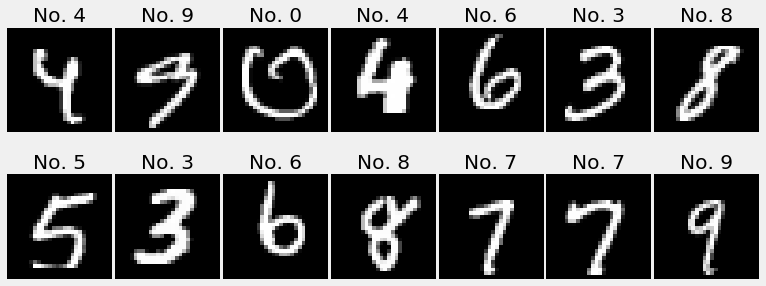

In [2]:
from matplotlib import style
style.use('fivethirtyeight') or plt.style.use('fivethirtyeight')

from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
np.random.seed(123)

# generate 14 random images from the dataset just to see
# (train_digits, train_labels), (test_digits, test_labels)  == (X_train, y_train), (X_test, y_test)
random_14 = np.random.randint(0, X_train.shape[0], 14)
sample_digits = X_train[random_14]
sample_labels = y_train[random_14]

num_rows, num_columns = 2,7
f, ax = plt.subplots(num_rows, num_columns, figsize=(12,5),
                    gridspec_kw={'wspace':0.03, 'hspace':0.01},
                    squeeze=True)

for r in range(num_rows):
    for c in range(num_columns):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
        
plt.show()

In [3]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
num_channels = 1

#reshape the image data
train_data = np.reshape(X_train, (X_train.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(X_test, (X_test.shape[0], image_height, image_width, num_channels))

#rescale the images in range of (0-1)
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# one-hot encode the labels
# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
from keras.utils import to_categorical
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)
y_train_cat.shape, y_test_cat.shape 

((60000, 10), (10000, 10))

In [4]:
# Splitting the training data into training and cross validation set
for i in range(5):
    indexes = np.random.permutation(len(train_data))
    
train_data = train_data[indexes]
y_train_cat = y_train_cat[indexes]

#giving 10% of train_data to cv
val_perc = 0.10
val_count = int(val_perc * len(train_data))

#validation data
val_data = train_data[:val_count,:]
val_train_cat = y_train_cat[:val_count,:]

#keeping rest in train data
training_data = train_data[val_count:,:]
y_train_cat2 = y_train_cat[val_count:,:]

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Softmax

def build_model():
    model = Sequential()
    #Adding convolution and maxpooling layer
    model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', padding = 'same',input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu', padding = 'same',input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same',input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flat

In [ ]:
results = model.fit(training_data, y_train_cat2, epochs=20, batch_size=64, validation_data=(val_data,val_train_cat))

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 27s 503us/step - loss: 0.1587 - acc: 0.9500 - val_loss: 0.0513 - val_acc: 0.9827
Epoch 2/20
54000/54000 [==============================] - 20s 370us/step - loss: 0.0448 - acc: 0.9861 - val_loss: 0.0347 - val_acc: 0.9888
Epoch 3/20
54000/54000 [==============================] - 21s 391us/step - loss: 0.0314 - acc: 0.9897 - val_loss: 0.0353 - val_acc: 0.9880
Epoch 4/20
54000/54000 [==============================] - 21s 387us/step - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0357 - val_acc: 0.9887
Epoch 5/20
54000/54000 [==============================] - 21s 392us/step - loss: 0.0201 - acc: 0.9939 - val_loss: 0.0324 - val_acc: 0.9903
Epoch 6/20
54000/54000 [==============================] - 21s 389us/step - loss: 0.0172 - acc: 0.9947 - val_loss: 0.0245 - val_acc: 0.9940
Epoch 7/20
54000/54000 [==============================] - 21s 391us/s

In [1]:
test_loss, test_acccuracy = model.evaluate(test_data, y_test_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' %(test_loss, test_acccuracy))

NameError: name 'model' is not defined

In [ ]:
predictions = model.predict(test_data)
first20_preds = np.argmax(predictions, axis=1)[:25]
first20_true = np.argmax(y_test_cat, axis=1)[:25]

print(first20_preds)
print(first20_true)

In [ ]:
random20_preds = np.argmax(predictions, axis=1)[255:275]
random20_true = np.argmax(y_test_cat, axis=1)[255:275]

print(random20_preds)
print(random20_true)

In [ ]:
#how many mismatches
(np.argmax(predictions, axis=1) != np.argmax(y_test_cat, axis=1)).sum()